Python scripts to create figures fot LaTeX

In [1]:
from importlib import reload
import sys

In [2]:
sys.path.append('/home/sejin8642/gd/ftnmr/ft')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

importing and instantiating fid module

In [24]:
reload(fid)

<module 'fid' from '/home/sejin8642/gd/ftnmr/ft/fid.py'>

In [4]:
import fid

In [84]:
s = fid.fid(shift=0.03, nsp=32, t_cut=16690)

In [6]:
x = s.t

In [7]:
y = s.signal

Plotting s vs. t for LaTeX

In [8]:
# default plt style to fix jupyter notebook margin issue when plotting
plt.style.use('default')

In [9]:
def graph(x, y, xlabel=r'$x$', ylabel=r'$y$', save=False, filename='figure.eps'):
    # LaTeX font with size 9
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": 'serif',
        "font.size": 9})
    
    # plots y vs. x in black line with linesize 2 with the given axes
    fig = plt.figure(figsize=(6,4), dpi=500)
    ax = fig.add_subplot(111)
    
    # minimums and maximums of x and y 
    xmin, xmax, ymin, ymax = min(x), max(x), min(y), max(y)
    
    # reset minimum and maximum of y if y-range does not contain 0
    if 0 < ymin: ymin = -0.1*ymax
    if ymax < 0: ymax = -0.1*ymin
    
    # configures plot axes, labels and their positions with arrow axis tips
    if (xmin <= 0) and (0 <= xmax):
        ax.spines['left'].set_position(('data', 0)) 
        ax.yaxis.set_label_coords(-xmin/(xmax - xmin), 1.02)
        ax.set_ylabel(ylabel, rotation=0)
        ax.plot(0, 1, "^k", markersize=3, transform=ax.get_xaxis_transform(), clip_on=False)
    else:
        ax.spines['left'].set_visible(False)
        ax.set_ylabel(ylabel).set_visible(False)
    
    ax.spines['bottom'].set_position(('data', 0)) 
    ax.xaxis.set_label_coords(1.02, -ymin/(ymax - ymin) + 0.02)
    ax.set_xlabel(xlabel)
    ax.plot(1, 0, ">k", markersize=3, transform=ax.get_yaxis_transform(), clip_on=False)

    # plots y vs. x in black line with linesize 2 with the given axes
    plt.plot(x, y, 'k-', linewidth=.5)
    plt.axis([xmin, xmax, 1.1*ymin, 1.1*ymax])

    # change the spine linewidth
    plt.rcParams['axes.linewidth'] = 0.2

    # deletes top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # changes the size of ticks (both major and minor) to zero if ticks==False
    ax.tick_params(axis=u'both', which=u'both', length=0)

    # no tick labels
    plt.xticks([])
    plt.yticks([])

    # save the figure as eps vector image if save==True
    if (save == True): 
        plt.savefig(filename, format='eps', transparent=True)
    
    # show the plot
    plt.show()

In [169]:
%matplotlib inline
plt.style.use('default')

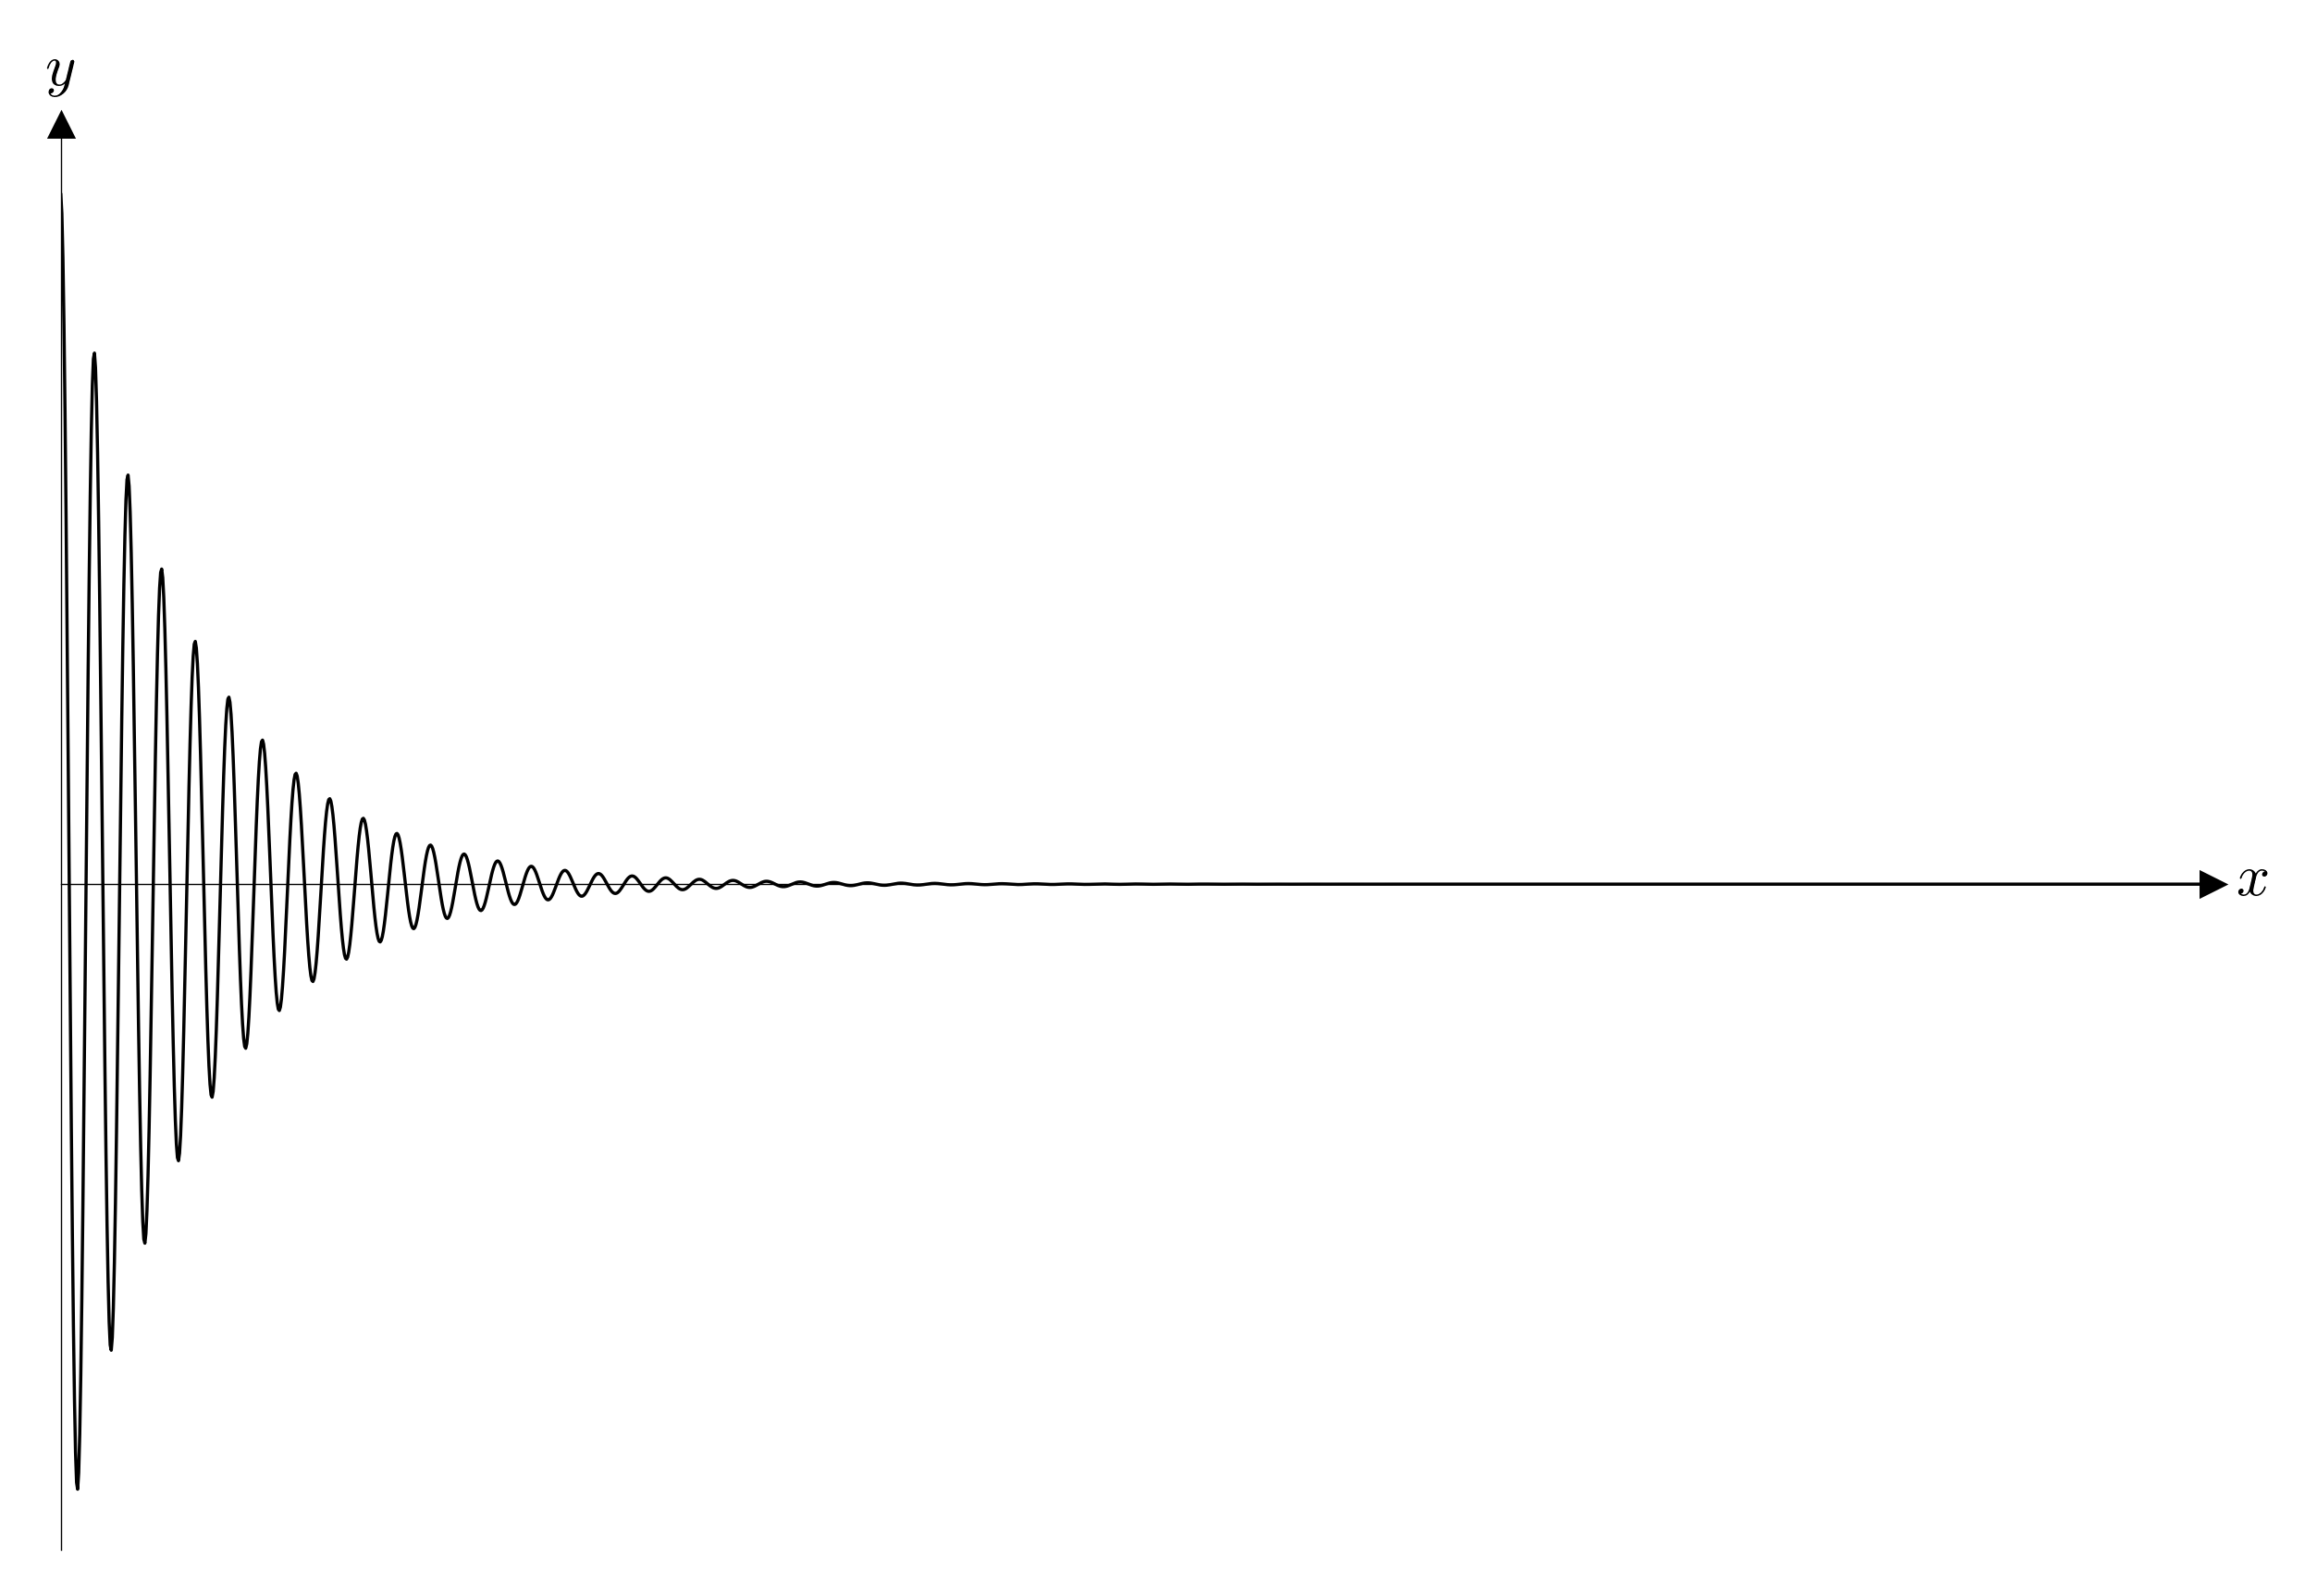

In [11]:
graph(x, y.real)

In [12]:
Y = scipy.fft.fft(y)

In [40]:
f = scipy.fft.fftfreq(len(y), d=s.dt)

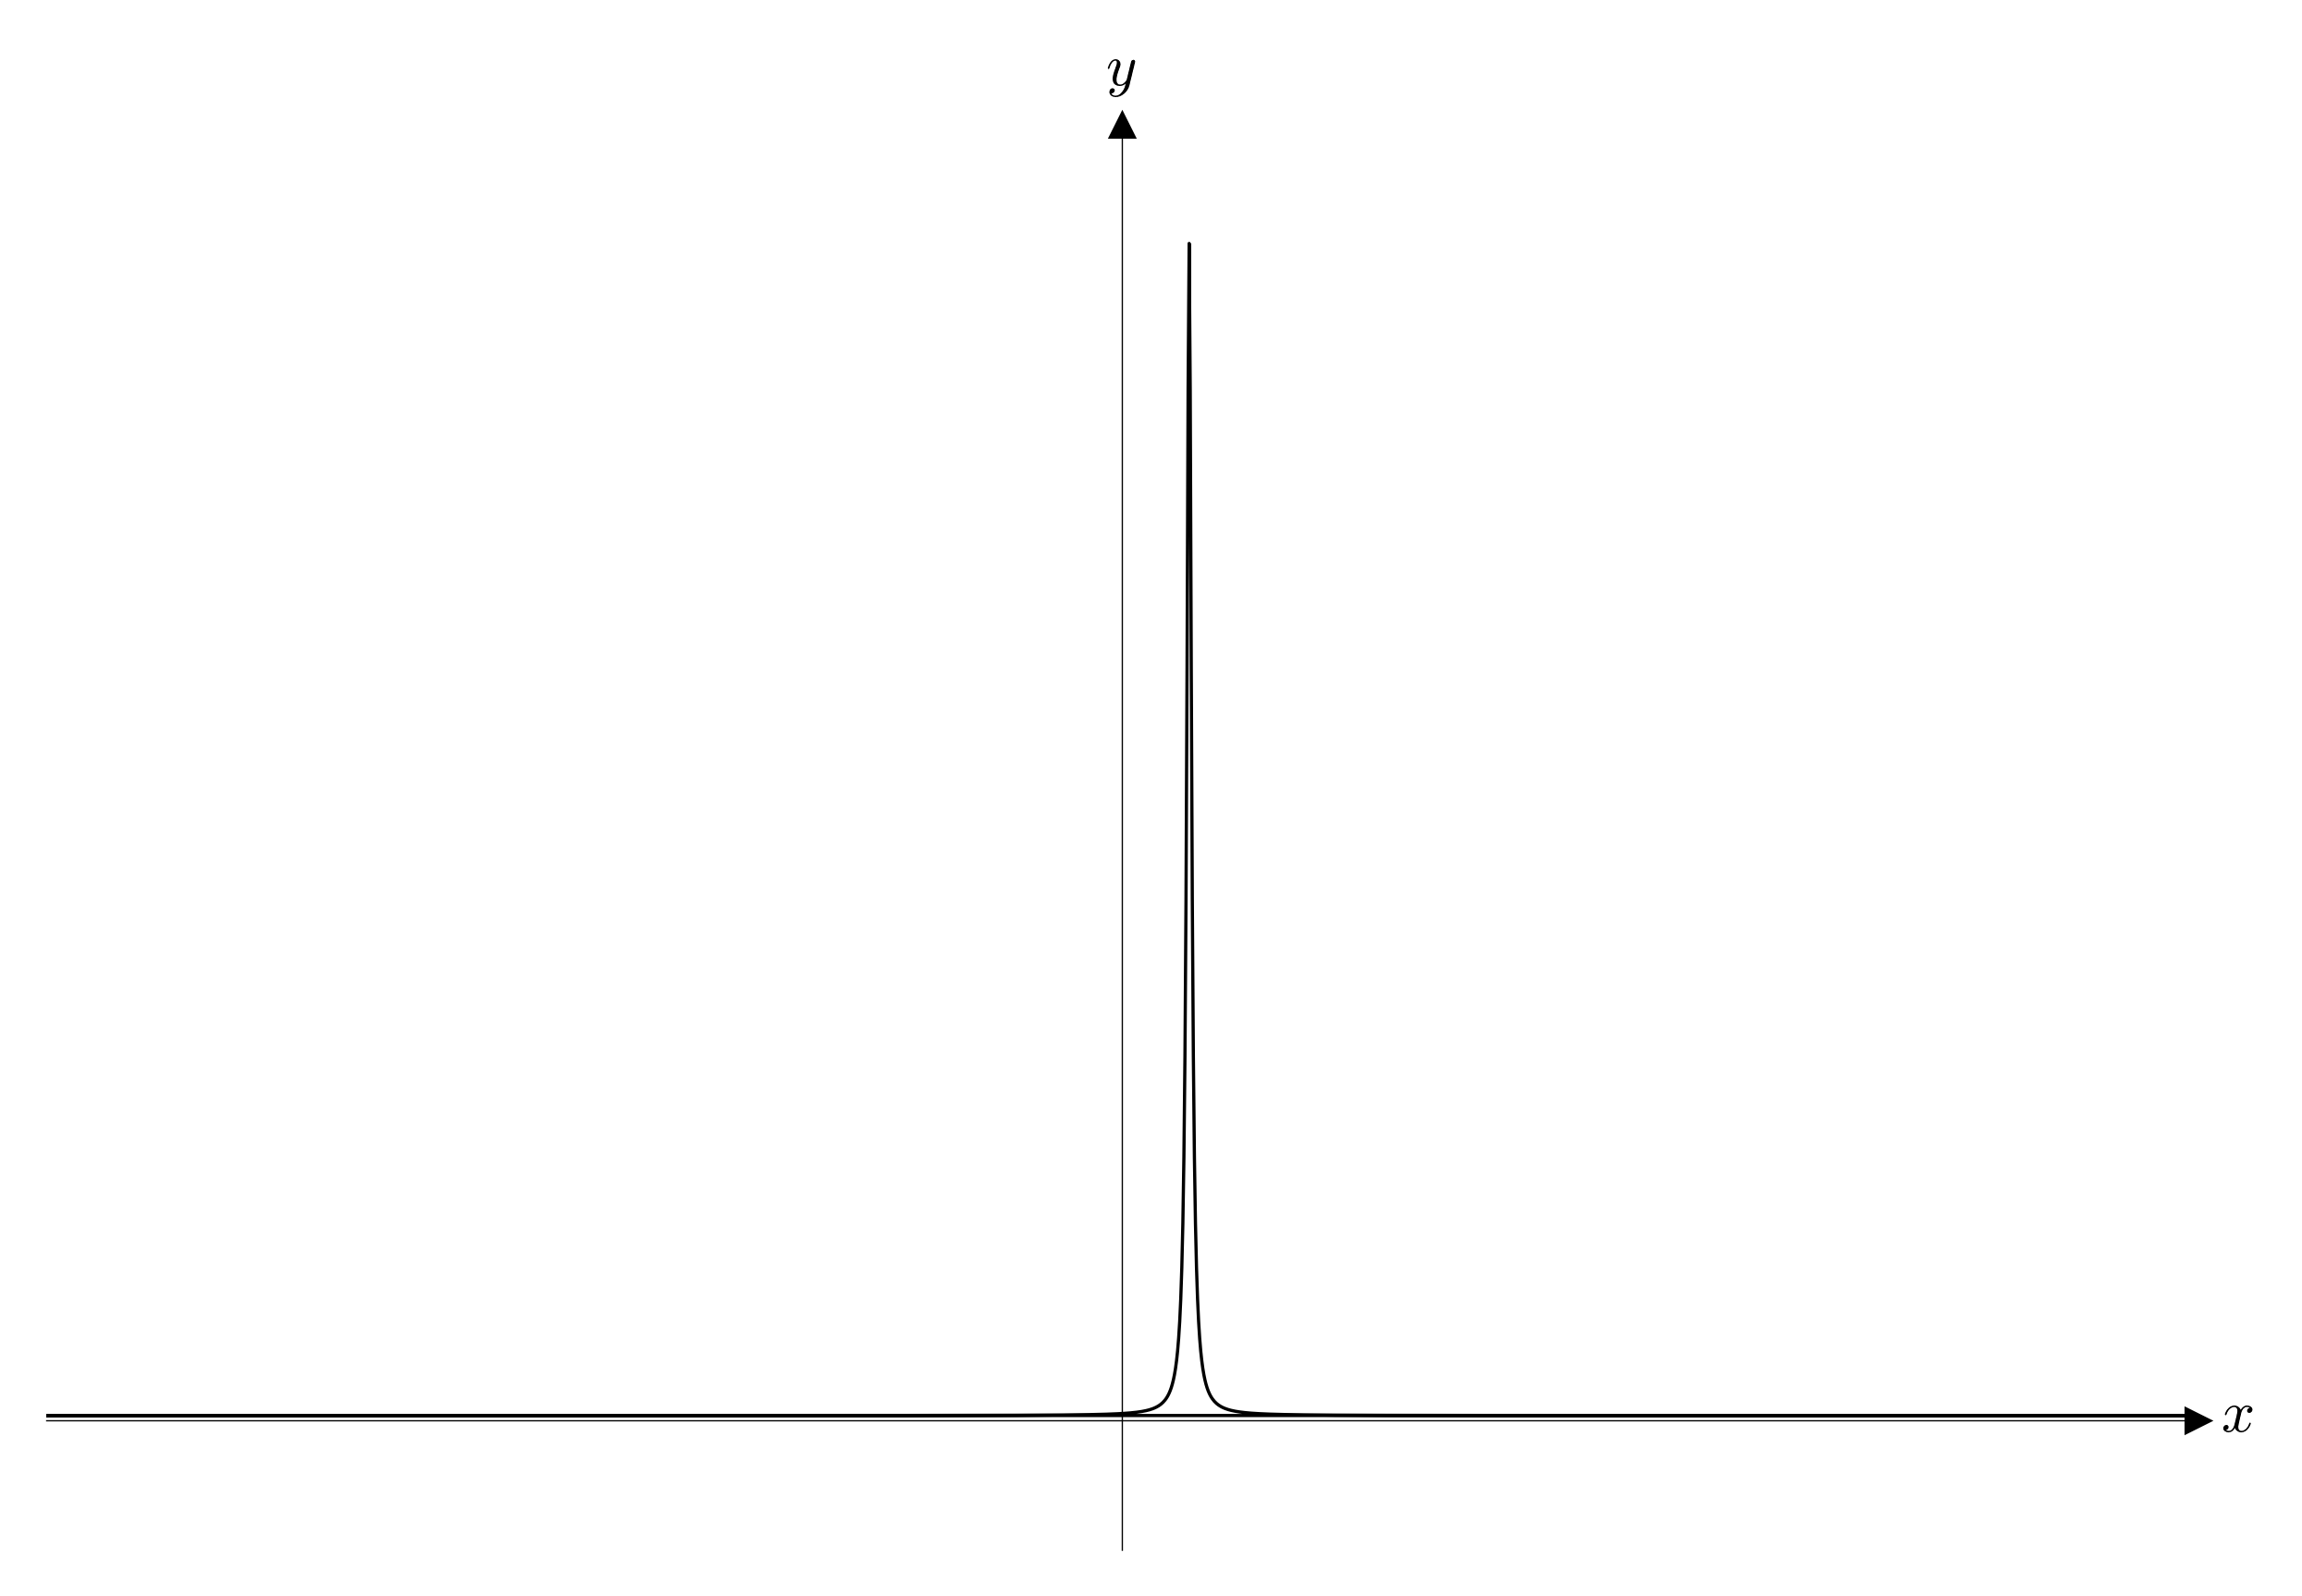

In [14]:
graph(f, Y.real)

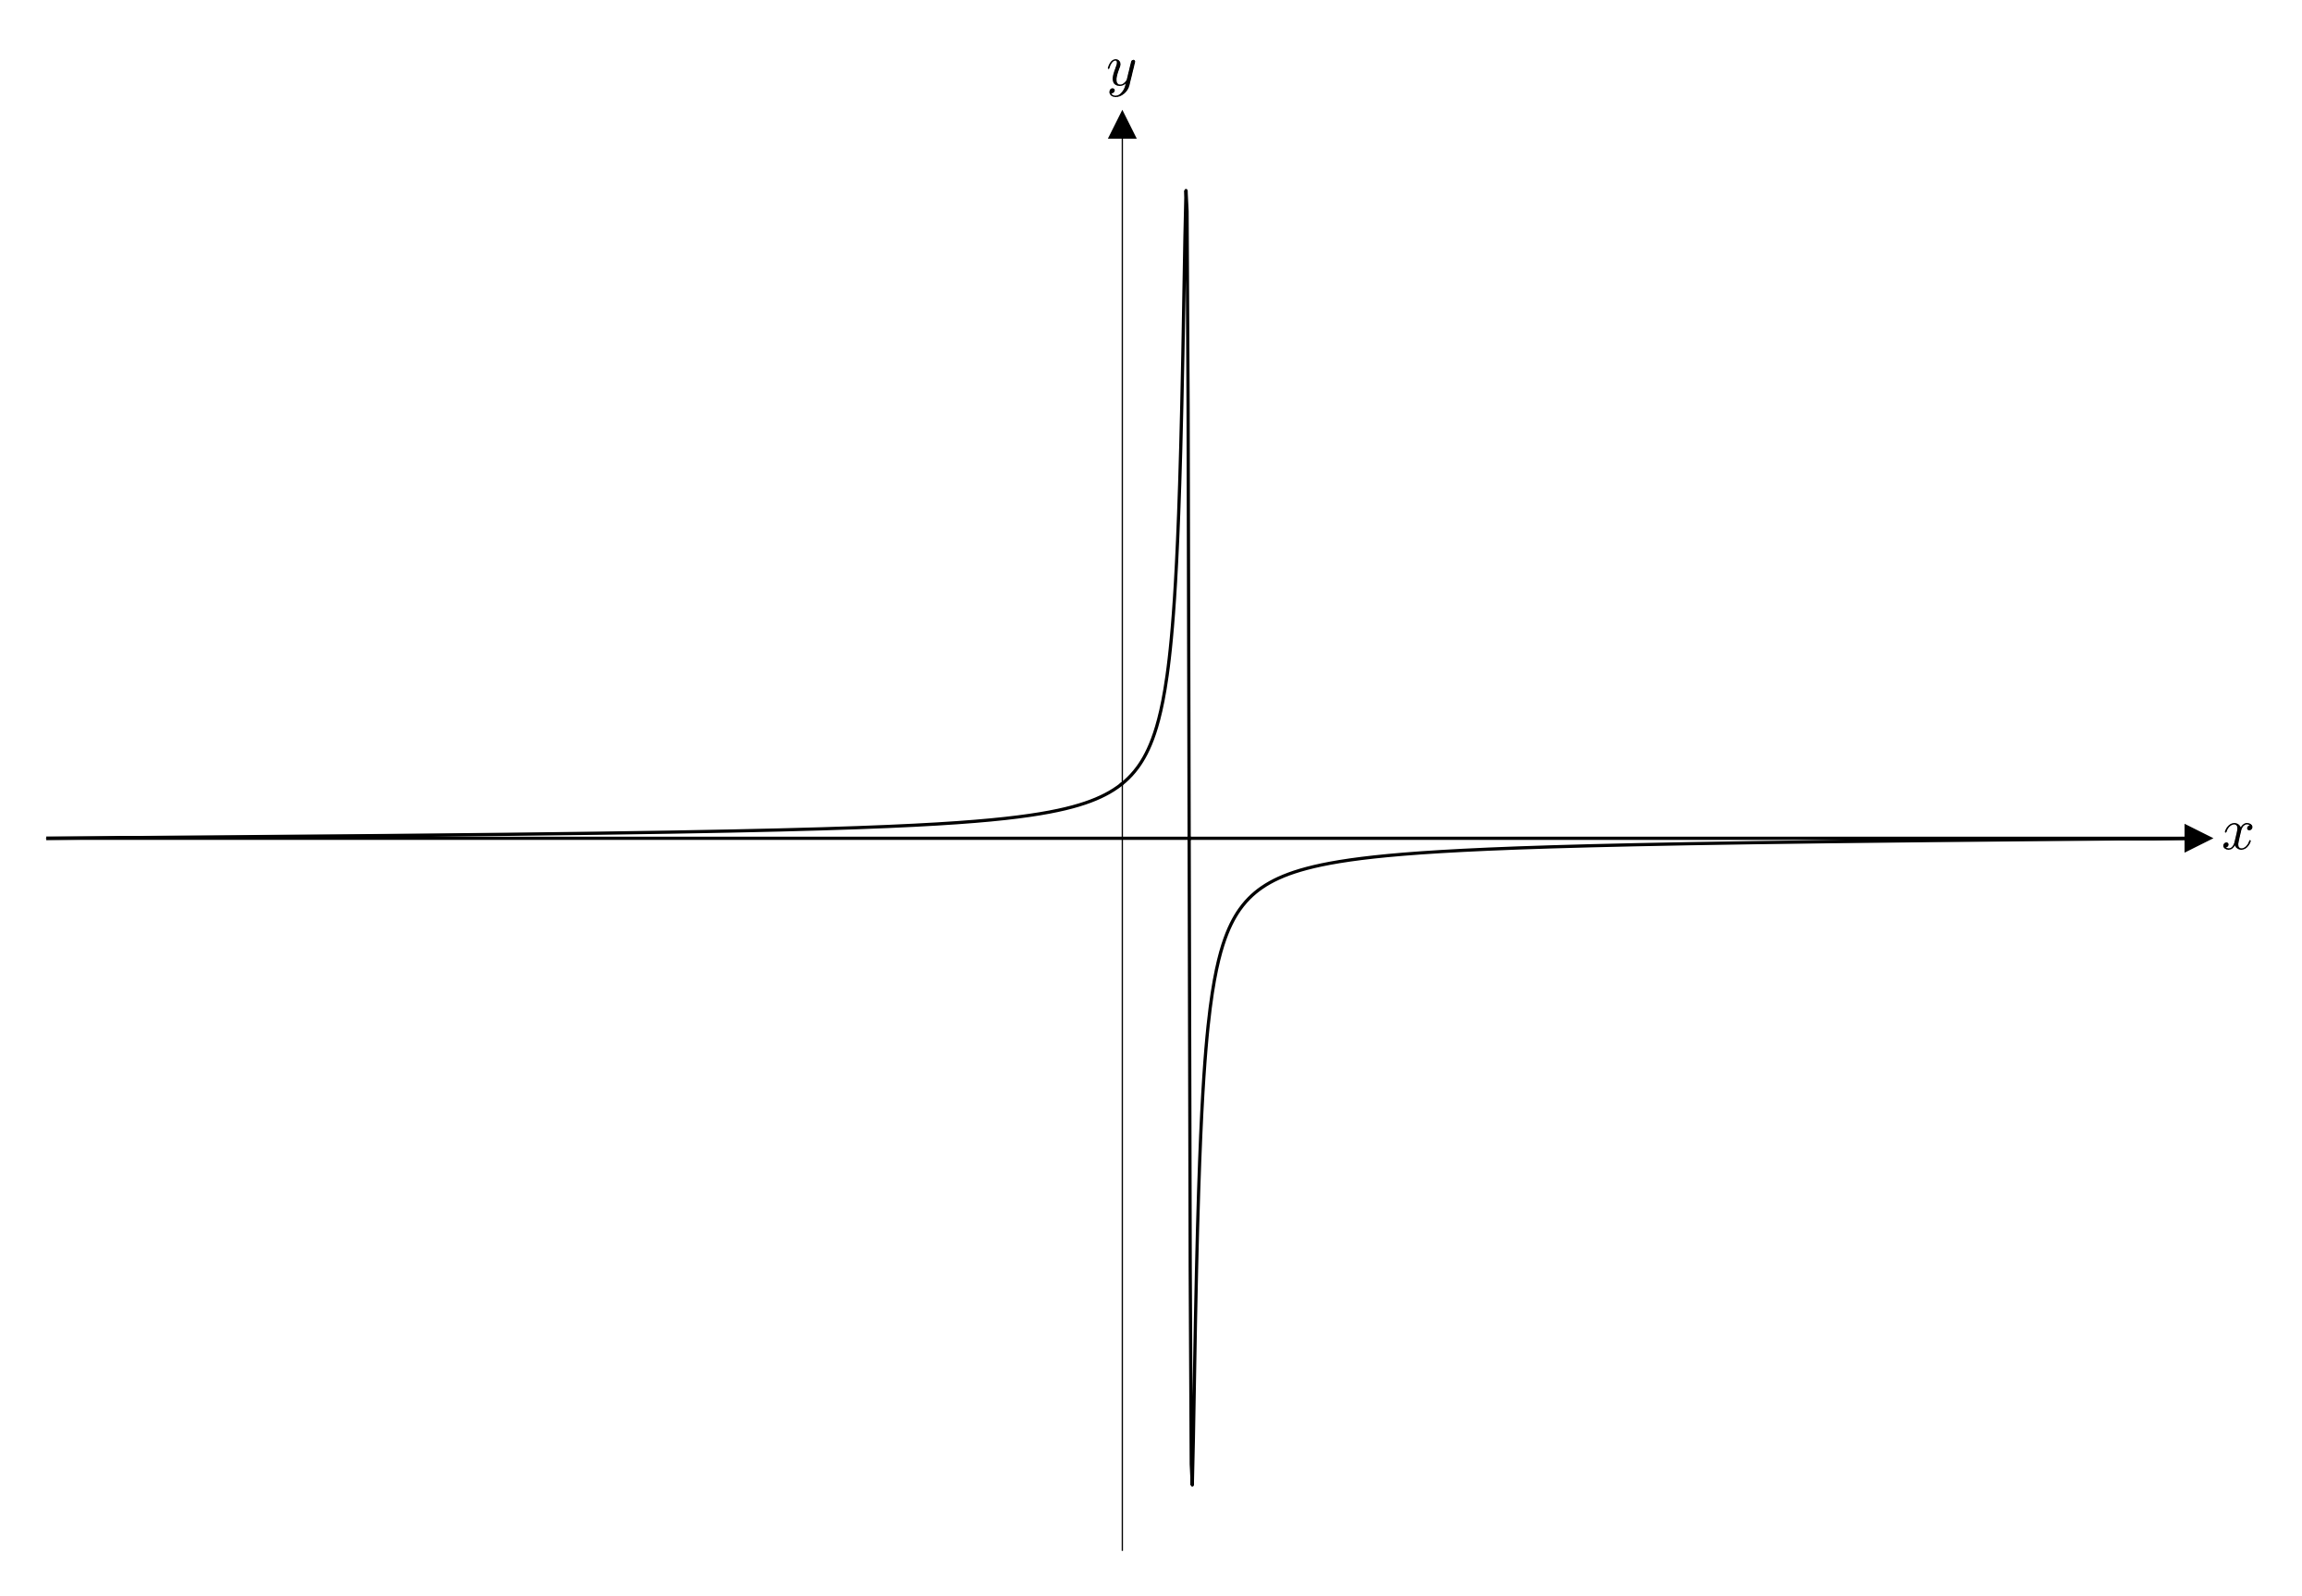

In [15]:
graph(f, Y.imag)

In [60]:
f_n = np.roll(f, len(f)//2)

In [63]:
f_n = f_n - f_n[0]

In [66]:
f_n[-1] + f[1]

0.061311569065678875

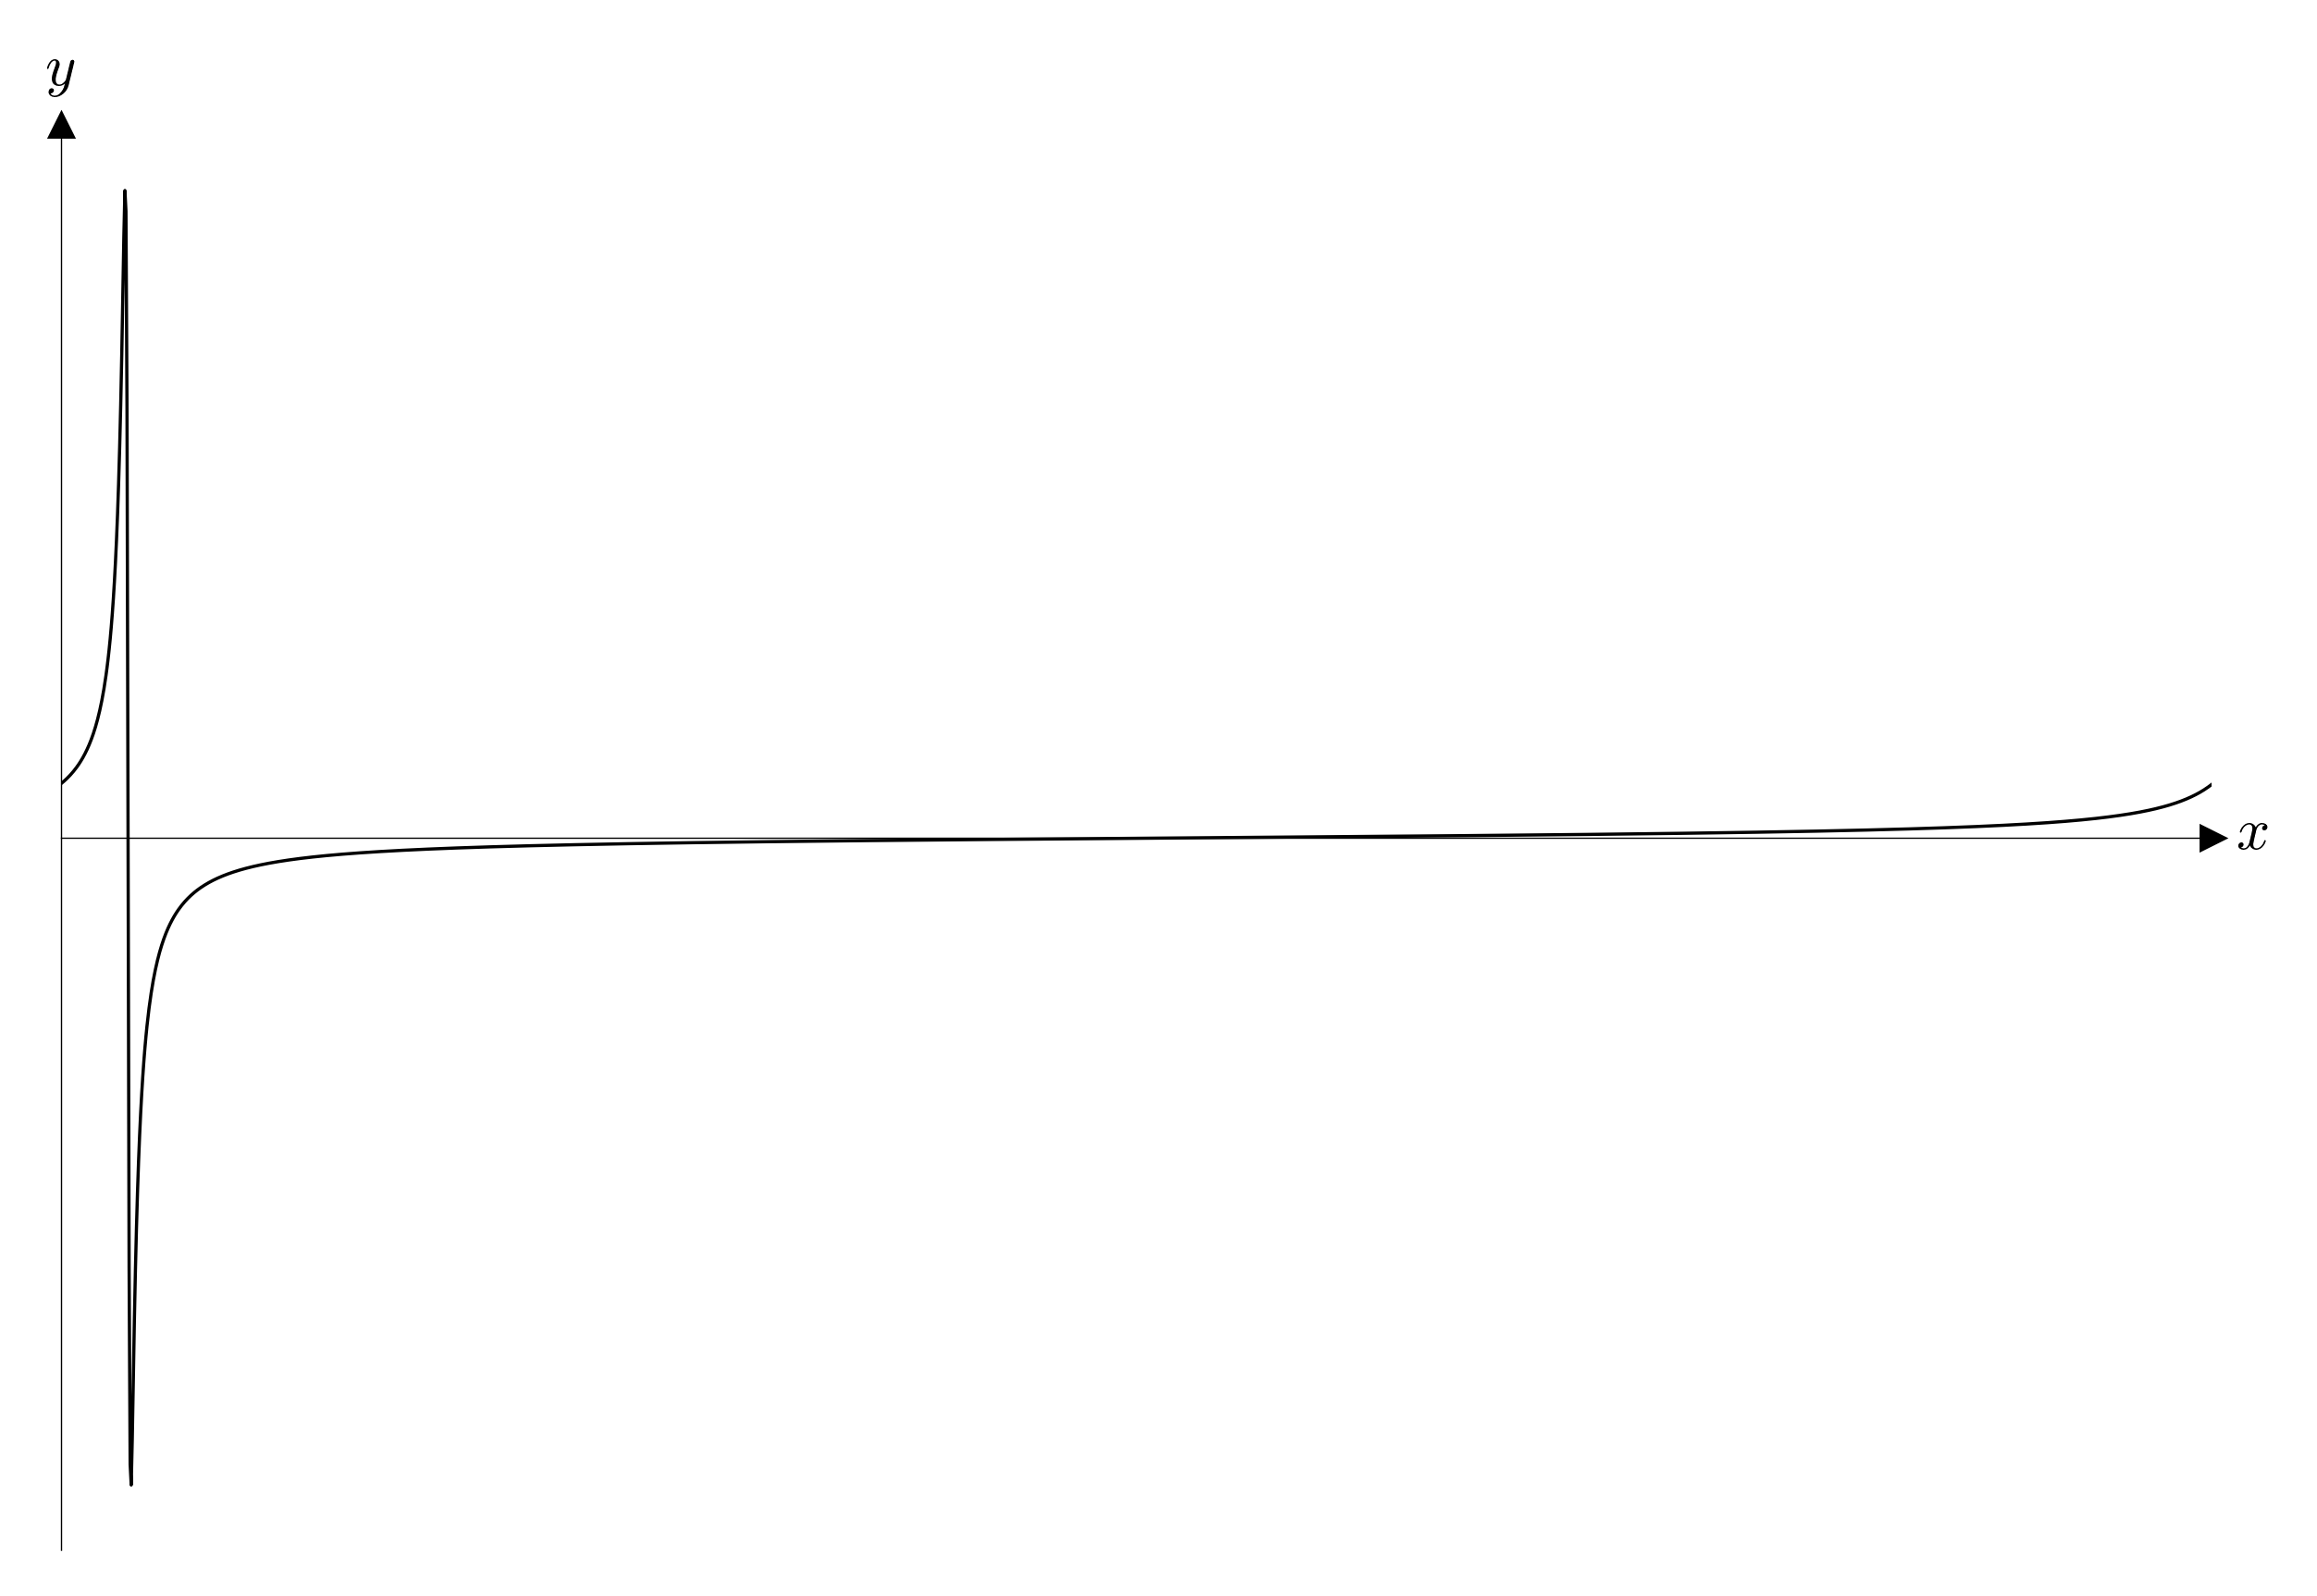

In [75]:
graph(f_n, Y.imag)

In [72]:
df = 1/(s.dt*len(f))

In [86]:
np.arange(0, len(f))*df + df

array([2.99372896e-05, 5.98745792e-05, 8.98118687e-05, ...,
       6.12516945e-02, 6.12816318e-02, 6.13115691e-02])

In [87]:
f_n[-1] + df

0.061311569065678875

In [85]:
s.f_s

0.061311569065678875

In [259]:
reload(fid)

<module 'fid' from '/home/sejin8642/gd/ftnmr/ft/fid.py'>

In [260]:
import fid

In [261]:
s1 = fid.fid(shift=0.05, dt=40)

In [262]:
x1 = s1.t

In [263]:
y1 = s1.signal

In [209]:
np.argmax(Y1.real)

142

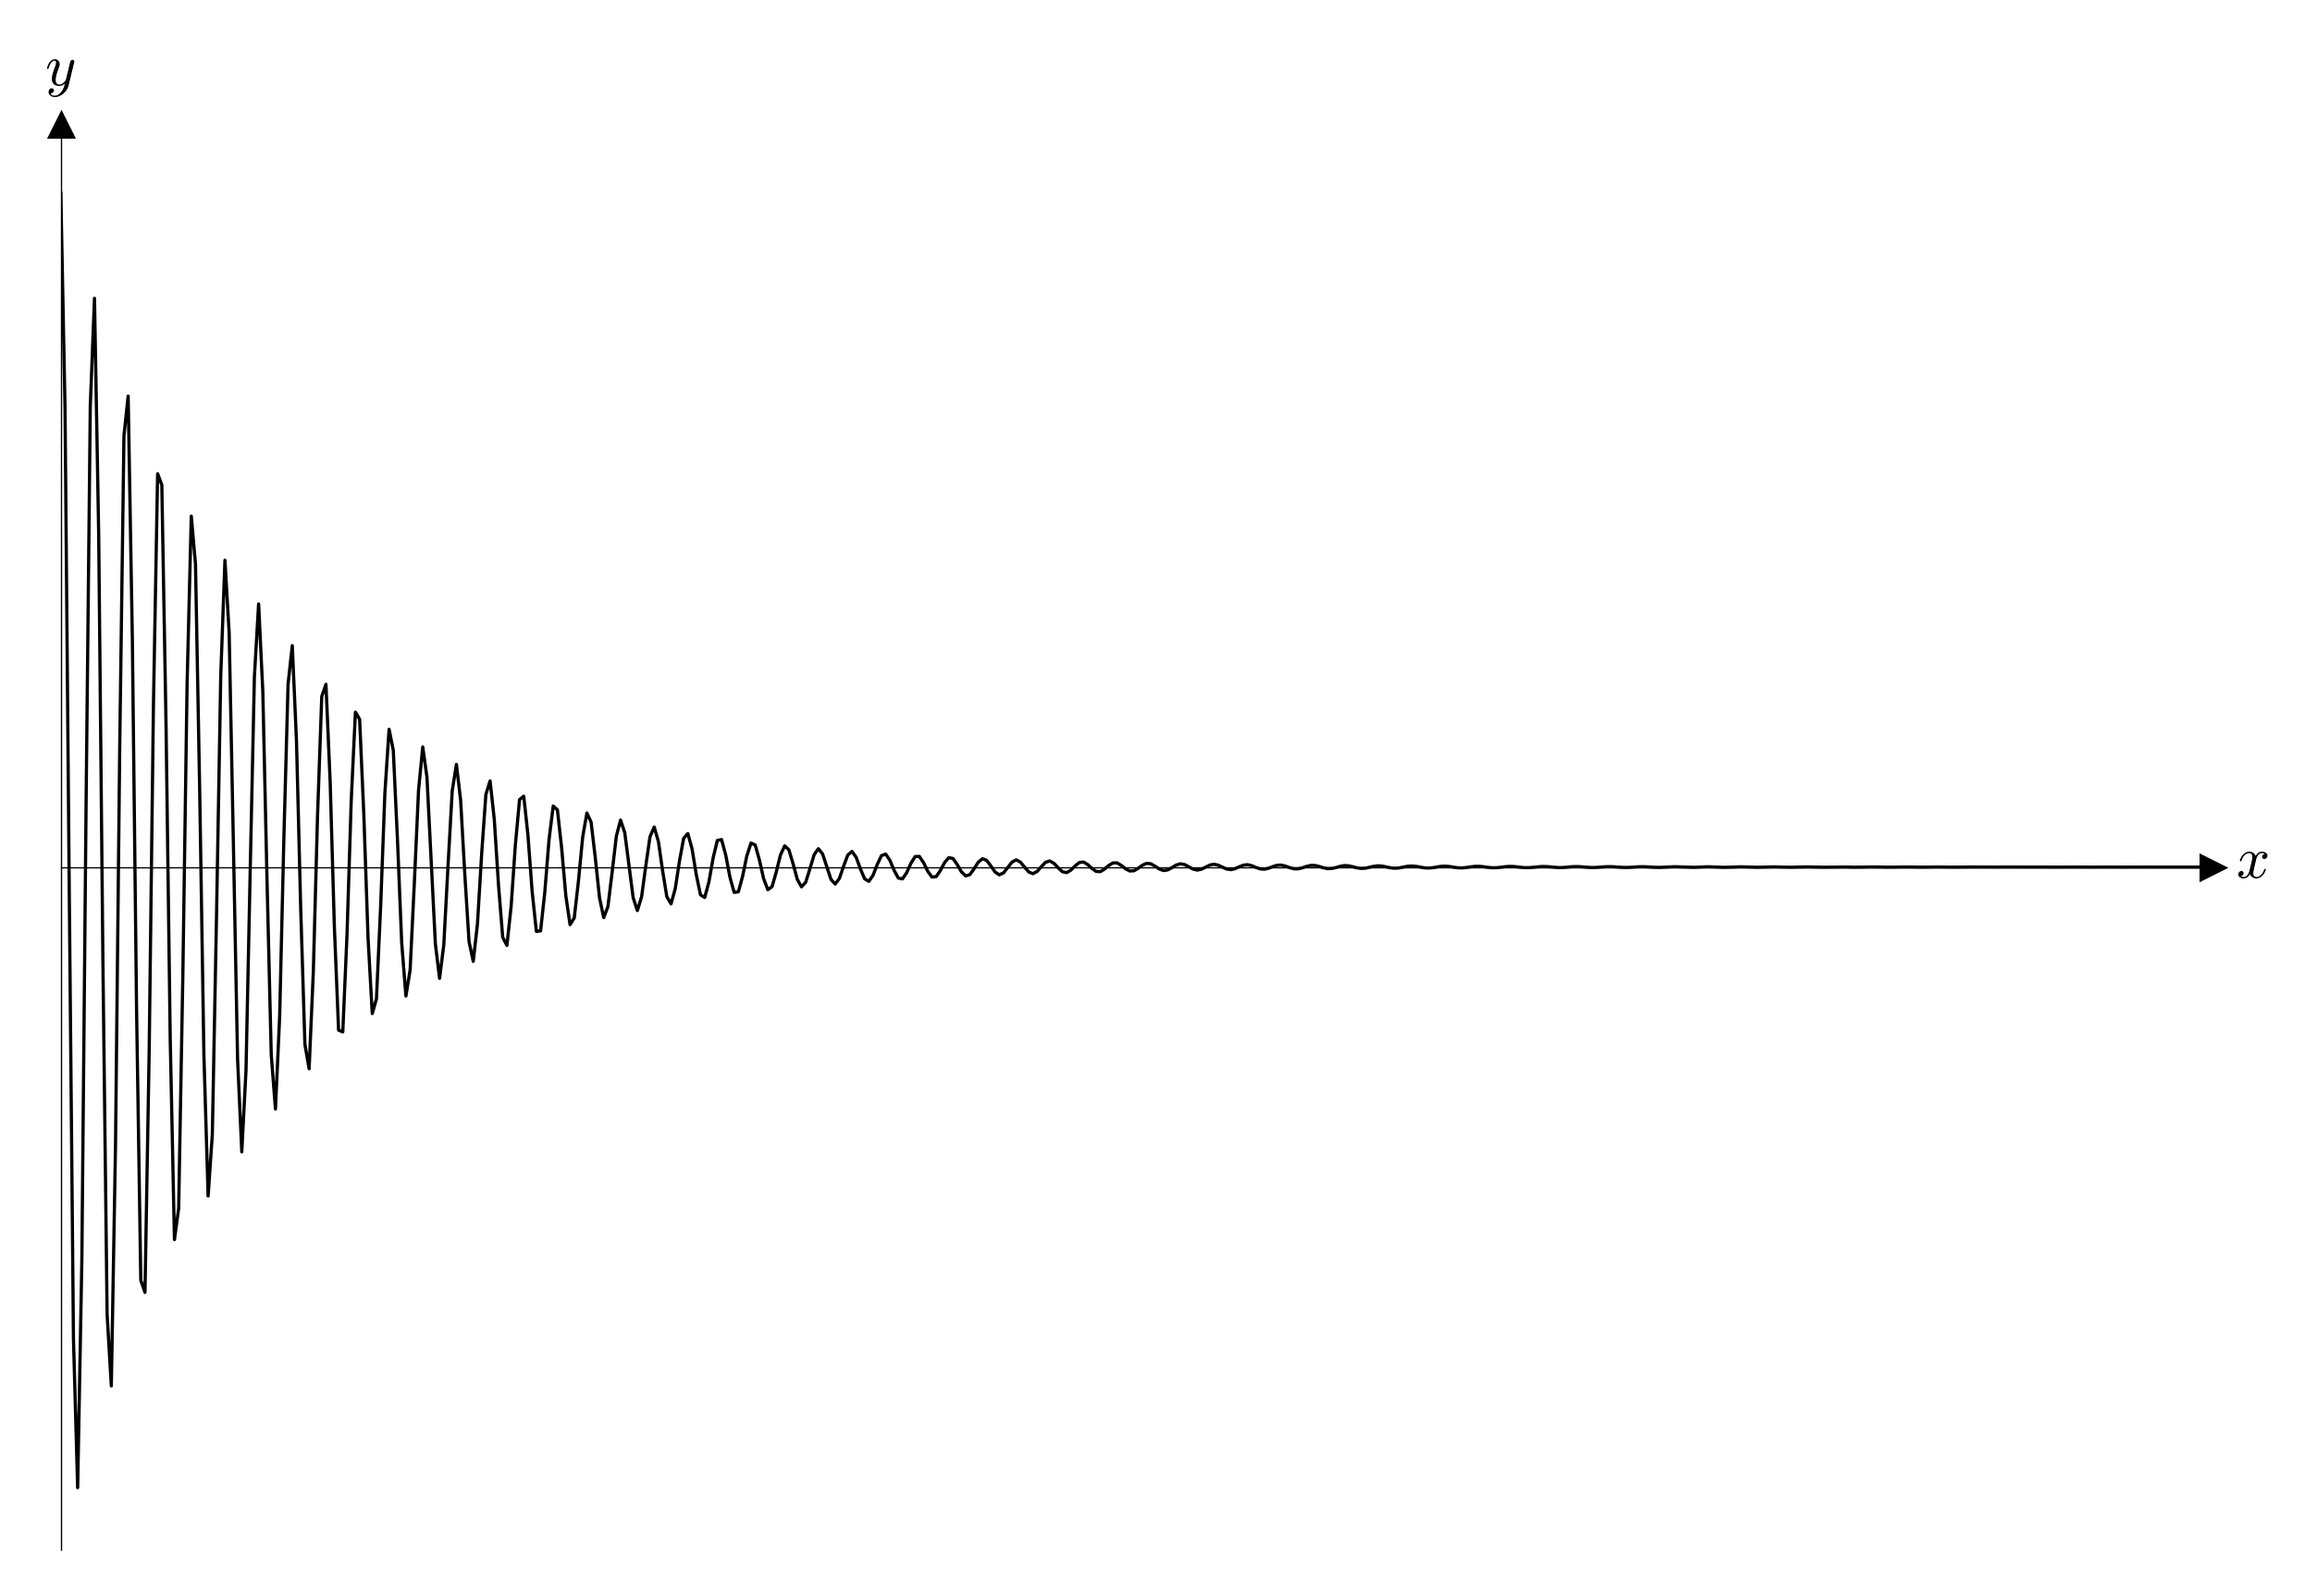

In [264]:
graph(x1, y1.real)

In [265]:
Y1 = scipy.fft.fft(y1)

In [266]:
f = s1.f

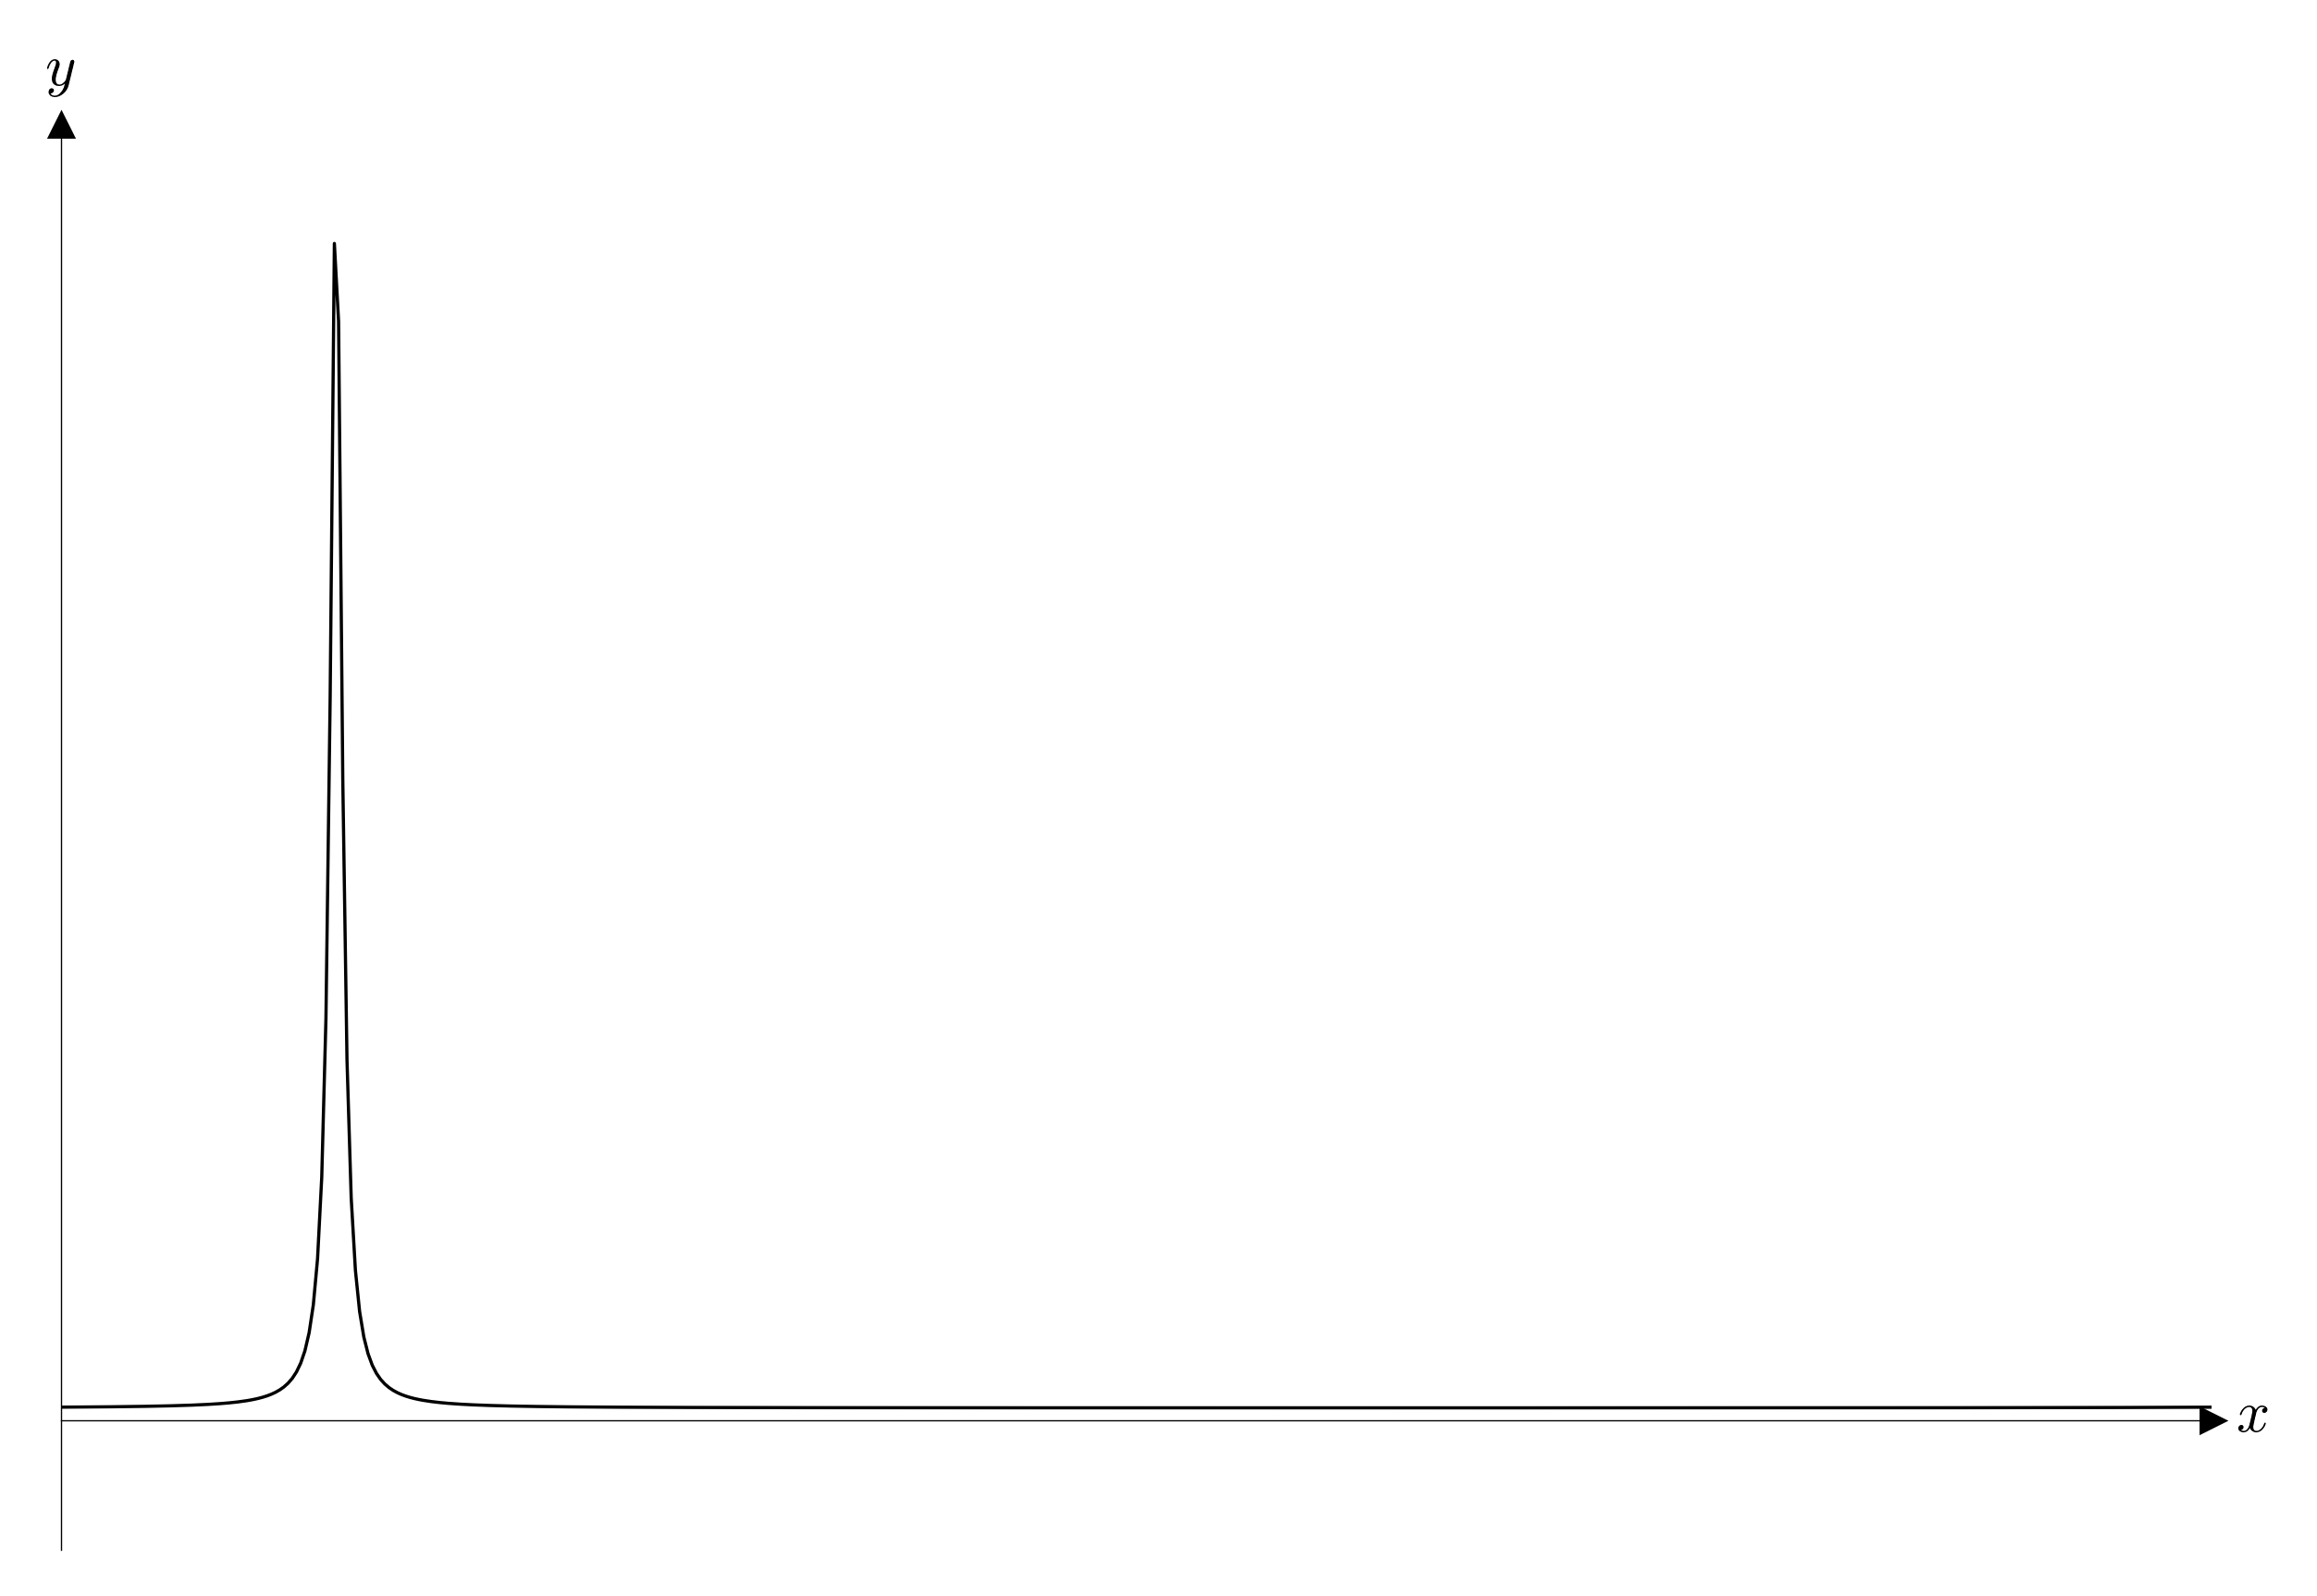

In [267]:
graph(f, Y1.real)

In [278]:
fid.fid.sfrq(shift=.10, dt=40)

(0.006386621777674884, 24.5951049158067)

In [277]:
fid.fid.sfrq(shift=.05, dt=40)

(0.003193310888837442, 49.1902098316134)

In [279]:
s2 = fid.fid(shift=0.10, dt=40)

In [280]:
s1 = fid.fid(shift=0.05, dt=40)

In [284]:
t = s1.t

In [286]:
y1 = s1.signal

In [287]:
y2 = s2.signal

In [288]:
Y1 = scipy.fft.fft(y1)

In [289]:
Y2 = scipy.fft.fft(y2)

In [295]:
f = s1.f

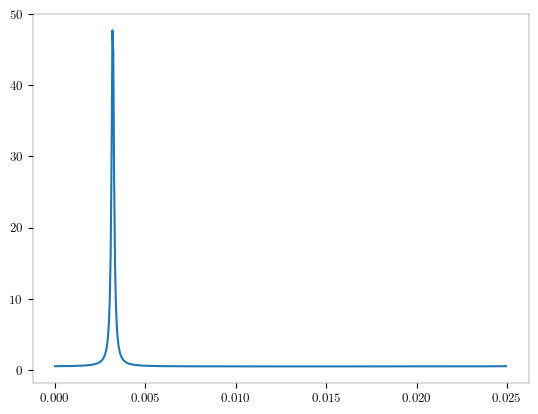

In [301]:
plt.plot(f, Y1.real)

In [298]:
y3 = y1 + y2

In [299]:
Y3 = scipy.fft.fft(y3)

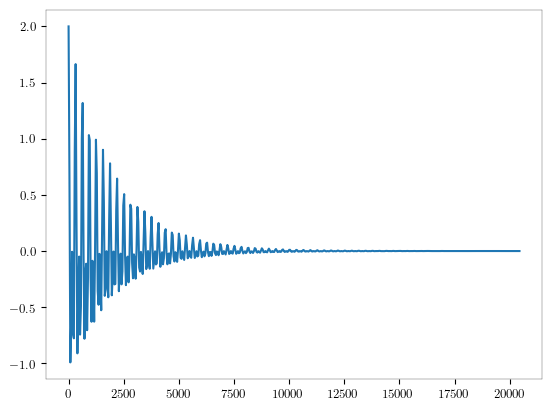

In [302]:
plt.plot(t, y3.real)